In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
# Loading the dataset
data = pd.read_csv('churn.csv')

In [ ]:
# Data Preprocessing
data['Geography'] = data['Geography'].replace({'Germany': 0, 'France': 1, 'Spain': 2})
data['Gender'] = data['Gender'].replace({'Female': 0, 'Male': 1})
data.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

# Performing one-hot encoding for categorical variables
data_encoded = pd.get_dummies(data)

In [53]:
# Splitting the data into features and target variable
X = data_encoded.drop('Exited', axis=1)
y = data_encoded['Exited']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
lgr_y_pred = lgr.predict(X_test)

# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_y_pred = rfc.predict(X_test)

# Evaluating models
print("Logistic Regression Accuracy Score:", accuracy_score(y_test, lgr_y_pred) * 100, "%")
print("Random Forest Accuracy Score:", accuracy_score(y_test, rfc_y_pred) * 100, "%")

# Print classification report
print("Classification Report (Random Forest):")
print(classification_report(y_test, rfc_y_pred))

# Print classification report
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, lgr_y_pred))

Logistic Regression Accuracy Score: 80.15 %
Random Forest Accuracy Score: 86.55000000000001 %
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.48      0.58       393

    accuracy                           0.87      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.47      0.08      0.14       393

    accuracy                           0.80      2000
   macro avg       0.64      0.53      0.51      2000
weighted avg       0.75      0.80      0.74      2000



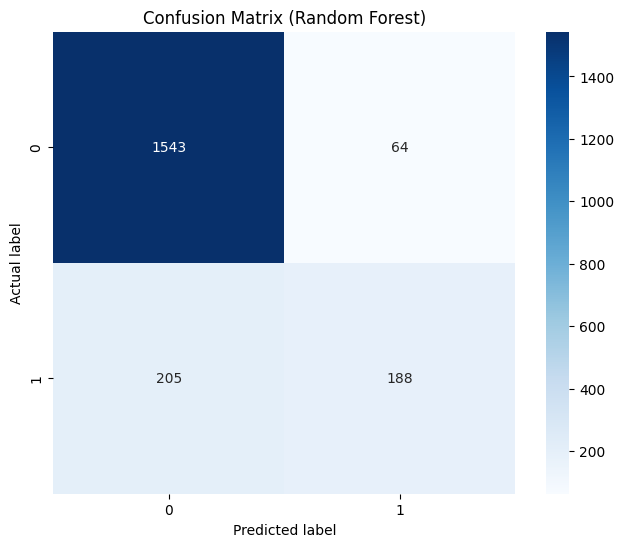

In [54]:
# Plotting confusion matrix for Random Forest
cm_rfc = confusion_matrix(y_test, rfc_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Blues', square=True)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

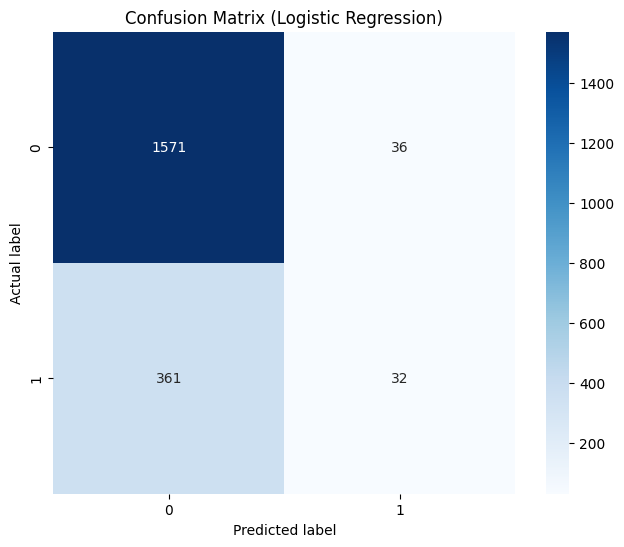

In [56]:
# Plotting confusion matrix for Random Forest
cm_lgr = confusion_matrix(y_test, lgr_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgr, annot=True, fmt='d', cmap='Blues', square=True)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

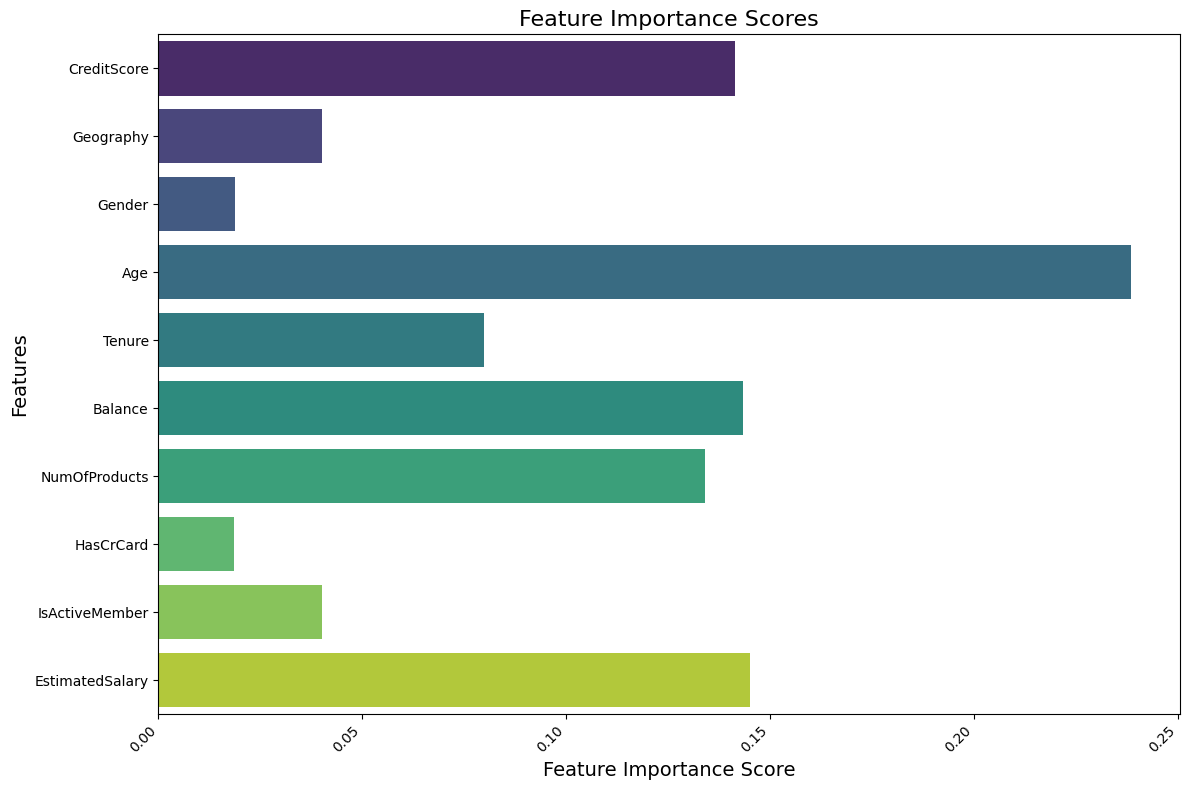

Feature Importance Values:
           Feature  Importance
3              Age    0.238653
9  EstimatedSalary    0.145081
5          Balance    0.143441
0      CreditScore    0.141396
6    NumOfProducts    0.134107
4           Tenure    0.079776
1        Geography    0.040132
8   IsActiveMember    0.040087
2           Gender    0.018732
7        HasCrCard    0.018593


In [59]:
# Feature Importance Analysis
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=X.columns, palette='viridis')
plt.xlabel('Feature Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importance Scores', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Feature Importance Values:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))